# Problem Statement:-
The objective of this project is to predict the price of a house using various features such as the number of rooms, crime rate, distance to employment centers, pupil-teacher ratio, and more. The dataset used resembles the well-known Boston Housing Datase.

# Tools Used
**Programming Language**: Python



**Libraries**:

pandas – for data loading and manipulation

numpy – for numerical operations

matplotlib, seaborn – for data visualization

scikit-learn – for linear regression, training, and evaluation



# Data Summary
**Dataset**: HousingData.csv



**Features Used**:

CRIM: Crime rate by town

RM: Average number of rooms per dwelling

LSTAT: % of lower status population

PTRATIO: Pupil-teacher ratio

DIS, AGE, NOX, TAX, CHAS, etc.

**Target Variable**:

MEDV: Median value of owner-occupied homes (in $1000s)

# Model Description
**Model Type**: Linear Regression (from sklearn.linear_model)


**Train/Test Split**: 80% training, 20% testing using train_test_split

**Training**: Model learns to fit a line that best predicts house prices

**Prediction**: Model estimates price (MEDV) from input features

STEP 1: Importing all necessary libraries and data-set

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

STEP2: Loading the dataset,undertsanding the data and checking for any missing value (if present and then handling the missing value
)

In [3]:
from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData.csv


In [4]:
df = pd.read_csv('HousingData.csv')

print("First 5 rows:\n", df.head())   #Data Understanding
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

df = df.dropna()

First 5 rows:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   N

STEP 3: Creating a scatter plot and a correlation heatmap to visually explore how different features relate to house prices and to identify patterns useful for model training.

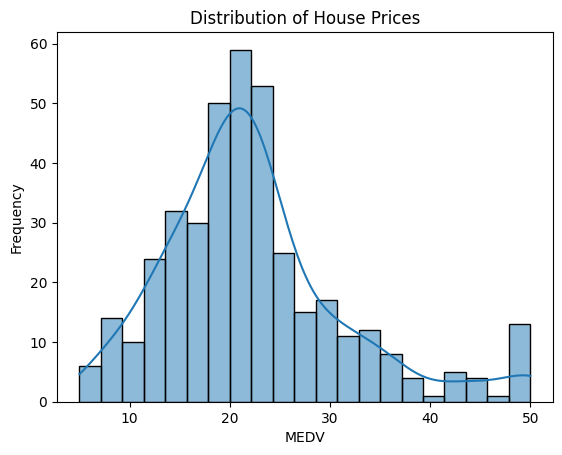

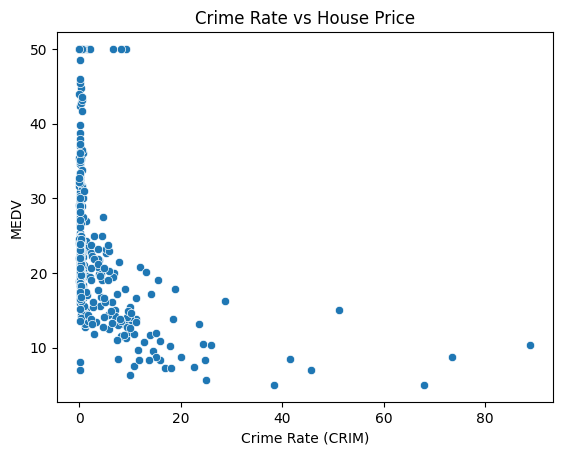

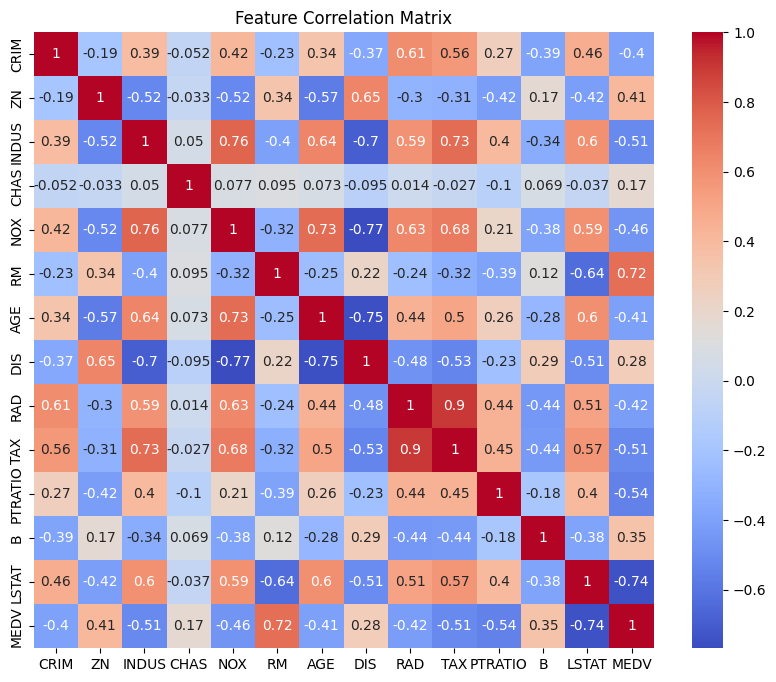

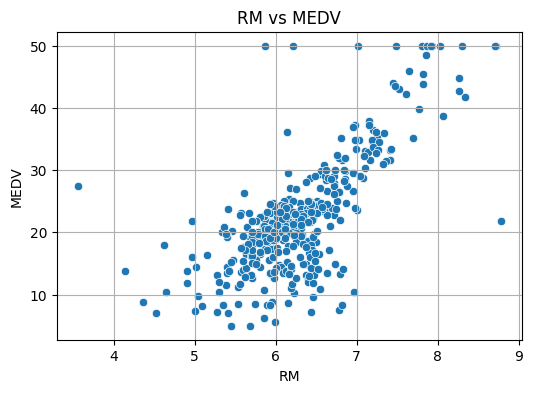

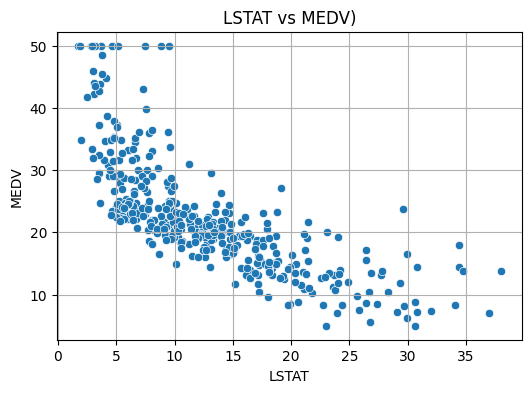

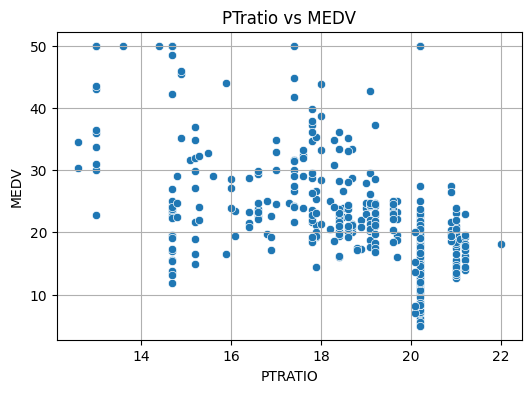

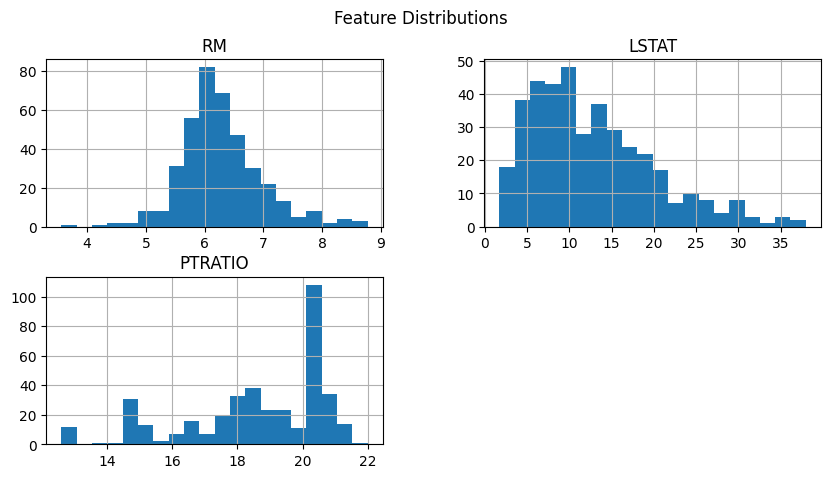

In [8]:
#Data Visualization
sns.histplot(df['MEDV'], kde=True)   #Distribution of house prices
plt.title("Distribution of House Prices")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()


sns.scatterplot(x='CRIM', y='MEDV', data=df)    # Crime Rate vs Price
plt.title("Crime Rate vs House Price")
plt.xlabel("Crime Rate (CRIM)")
plt.ylabel("MEDV")
plt.show()

plt.figure(figsize=(10, 8))   # Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=df)  #RM vs MEDV
plt.title("RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))   #LSTAT vs MEDV
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title("LSTAT vs MEDV)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))  #PTRATIO vs MEDV
sns.scatterplot(x='PTRATIO', y='MEDV', data=df)
plt.title("PTratio vs MEDV")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.grid(True)
plt.show()


selected_features = ['RM', 'LSTAT', 'PTRATIO']
target = 'MEDV'
df[selected_features].hist(bins=20, figsize=(10, 5))  #Histograms of selected features
plt.suptitle("Feature Distributions")
plt.show()


STEP 4:
Now we are going to be splitting the data into train and test data sets and putting it through a Linear Regression model and calculate the MSE and R2 score


Model Evaluation:
Mean Squared Error: 31.45
R² Score: 0.63


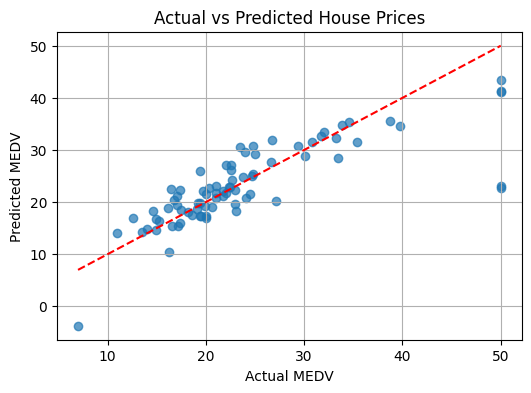

In [ ]:
#Feature and Target Definition
X = df.drop('MEDV', axis=1)  # Use all other columns as features
y = df['MEDV']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()


# Summary of Process and Findings
We began by loading and cleaning the housing dataset, removing any missing values to ensure accurate model training. We then visualized key feature relationships with house prices using scatter plots (e.g., RM vs MEDV, LSTAT vs MEDV) and a correlation matrix. These visual insights confirmed that features like number of rooms and lower-status population had strong influence on house price.

After preprocessing, we split the dataset into training and testing sets and trained a Linear Regression model using scikit-learn. The model learned patterns from the features to predict the target variable. We evaluated the model using Mean Squared Error (MSE) and R² score.

# Challenges Faced and How We Solved Them

1. Target Column Naming (PRICE vs MEDV)

Solution- We ensured the correct column (MEDV) was used as the target in the code.

2. Understanding Feature Relationships:

Solution- Initially unclear correlations were resolved using visualizations like scatter plots and heatmaps.

3. Small Dataset for Testing:

Solution: We used a small sample dataset for development, knowing that a larger one would improve results.

# Model Performance
1. Mean Squared Error (MSE): 31.45

2. R² Score: ~0.63

3. These values indicate that the model was able to explain about 63% of the variance in housing prices, which is reasonable for a simple linear model on real-world data.

# Suggested Improvements

1. Use more advanced models like Polynomial Regression, Random Forest, or Gradient Boosting for better accuracy.

2. Apply cross-validation to improve reliability and reduce overfitting.

3. Add feature engineering (e.g., interaction terms, log transforms).
4. Instead of a single train-test split, use K-Fold Cross-Validation for more robust evaluation

# Results and Conclusion
Mean Squared Error- ~31.45

R² Score- ~0.63

---



1. RM vs MEDV: Showed a strong positive correlation — more rooms usually means higher house price.

2. LSTAT vs MEDV: Showed a strong negative correlation — higher poverty implies lower house price.

3. PTRATIO vs MEDV: Moderate negative impact on house price.

---

